In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from speech_direction import get_directions_num

In [2]:
diarization_csv_path = "./transcript_demo.csv"
# diarization_csv_path = "/home/icer/Project/dataset/transcript/transcript.csv"

total_speaker = 6  # speakerの総数

directions_num = get_directions_num(
    diarization_csv_path,
    total_speaker
)

[009]: 3 → 0
[010]: 0 → 2
[015]: 2 → 3
[016]: 3 → 1
[017]: 1 → 5
[018]: 5 → 4
[019]: 4 → 2
[021]: 2 → 3
[022]: 3 → 4
[023]: 4 → 0
[025]: 0 → 1
[026]: 1 → 0
[027]: 0 → 1
[028]: 1 → 0
[029]: 0 → 1
[030]: 1 → 2
[031]: 2 → 1
[032]: 1 → 3
[033]: 3 → 4
[034]: 4 → 5
[035]: 5 → 1
[036]: 1 → 0
[037]: 0 → 2
[038]: 2 → 1
[039]: 1 → 3
[040]: 3 → 4
[041]: 4 → 2
[043]: 2 → 4
[044]: 4 → 3
[045]: 3 → 0
[046]: 0 → 1
[047]: 1 → 0
[[0 4 2 0 0 0]
 [4 0 1 2 0 1]
 [0 2 0 2 1 0]
 [2 1 0 0 3 0]
 [1 0 2 1 0 1]
 [0 1 0 0 1 0]]


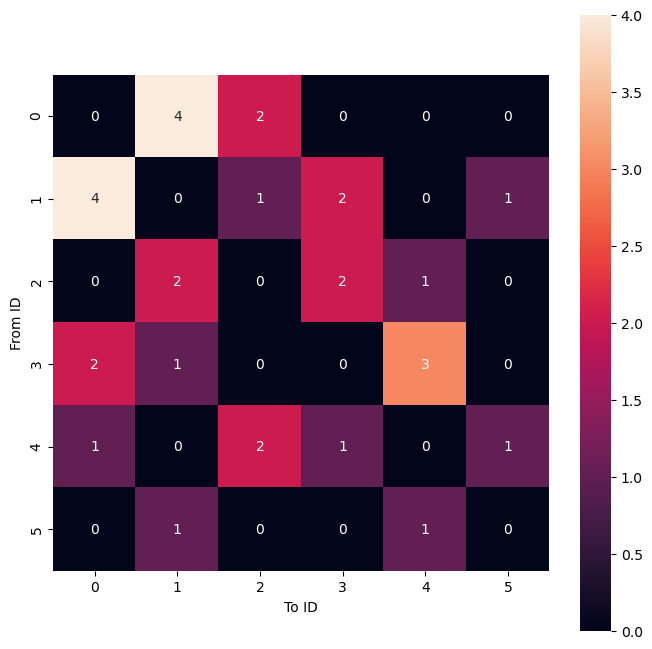

In [3]:
plt.figure(figsize=(8, 8))

# print(directions_num)
sns.heatmap(
    directions_num, # データ
    annot=True,
    square=True, # ヒートマップを正方形で表示
)
plt.ylabel("From ID")
plt.xlabel("To ID")
plt.show()

In [4]:
## 個人の発言回数に占める割合

print("個人の発言回数に占める割合\n")
for start in range(directions_num.shape[0]):
    start_sum = np.sum(directions_num[start])
    print(f"== ID-{start} ==")
    for end in range(directions_num.shape[1]):
        if start == end:
            continue
        ratio = directions_num[start][end] / start_sum
        print(f"{start}→{end}: {ratio*100:.2f}%")
    print("")

個人の発言回数に占める割合

== ID-0 ==
0→1: 66.67%
0→2: 33.33%
0→3: 0.00%
0→4: 0.00%
0→5: 0.00%

== ID-1 ==
1→0: 50.00%
1→2: 12.50%
1→3: 25.00%
1→4: 0.00%
1→5: 12.50%

== ID-2 ==
2→0: 0.00%
2→1: 40.00%
2→3: 40.00%
2→4: 20.00%
2→5: 0.00%

== ID-3 ==
3→0: 33.33%
3→1: 16.67%
3→2: 0.00%
3→4: 50.00%
3→5: 0.00%

== ID-4 ==
4→0: 20.00%
4→1: 0.00%
4→2: 40.00%
4→3: 20.00%
4→5: 20.00%

== ID-5 ==
5→0: 0.00%
5→1: 50.00%
5→2: 0.00%
5→3: 0.00%
5→4: 50.00%



In [5]:
## 全体の発言回数に占める割合

print("の発言回数に占める割合\n")
total_sum = np.sum(directions_num)
for start in range(directions_num.shape[0]):
    print(f"== ID-{start} ==")
    for end in range(directions_num.shape[1]):
        if start == end:
            continue
        ratio = directions_num[start][end] / total_sum
        print(f"{start}→{end}: {ratio*100:.2f}%")
    print("")

全体の発言回数に占める割合

== ID-0 ==
0→1: 12.50%
0→2: 6.25%
0→3: 0.00%
0→4: 0.00%
0→5: 0.00%

== ID-1 ==
1→0: 12.50%
1→2: 3.12%
1→3: 6.25%
1→4: 0.00%
1→5: 3.12%

== ID-2 ==
2→0: 0.00%
2→1: 6.25%
2→3: 6.25%
2→4: 3.12%
2→5: 0.00%

== ID-3 ==
3→0: 6.25%
3→1: 3.12%
3→2: 0.00%
3→4: 9.38%
3→5: 0.00%

== ID-4 ==
4→0: 3.12%
4→1: 0.00%
4→2: 6.25%
4→3: 3.12%
4→5: 3.12%

== ID-5 ==
5→0: 0.00%
5→1: 3.12%
5→2: 0.00%
5→3: 0.00%
5→4: 3.12%



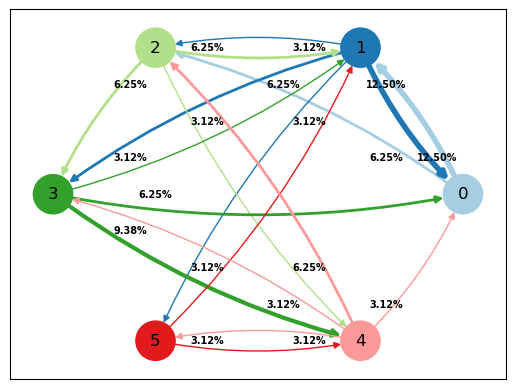

In [61]:
# edgeのラベルを%表示する場合
is_percent_label = True

df_directions_num = pd.DataFrame(directions_num)
# edgeの重みが0のものをマスク
df_directions_num = df_directions_num.mask(df_directions_num == 0)

# エッジリストを生成
edge_lists = df_directions_num.stack().reset_index().apply(tuple, axis=1).values
# float型→int型
for i in range(edge_lists.shape[0]):
    edge_lists[i] = tuple(map(int, edge_lists[i]))

# print(edge_lists)
G = nx.MultiDiGraph()
G.add_weighted_edges_from(edge_lists)
pos = nx.circular_layout(G)

# weight に応じてラインの太さを調整
line_width = [d['weight'] for u,v,d in G.edges(data=True)]

# nodeとそれを始点とするedgeごとに色指定
cmap = plt.get_cmap('Paired')
node_color = [cmap(node) for node in G.nodes]
edge_color = [cmap(edge[0]) for edge in G.edges]

# networkを描画
nx.draw_networkx(G, pos=pos, node_size=800, node_color=node_color, edge_color=edge_color, width=line_width, connectionstyle="arc3,rad=0.1")

# edgeのラベルを指定
if is_percent_label:
    sum_weight = np.sum(directions_num)
    edge_labels = {(u, v): f"{(d['weight'] / sum_weight)*100:.2f}%" for u, v, d in G.edges(data=True)}
else:
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
# edgeのラベルを描画
nx.draw_networkx_edge_labels(G, pos, label_pos=0.75, edge_labels=edge_labels, font_size=7, font_weight='bold', bbox=dict(alpha=0.), rotate=False)

plt.show()